# EDA on Income Data of adults

In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns",None)


In [2]:
data=pd.read_csv("adult.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.shape

(32561, 15)

In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [7]:
data.duplicated().sum()

24

# Data Cleaning

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
#separating categorical and numerical columns
categorical_features=data.select_dtypes(include="object").columns
numerical_features=data.select_dtypes(exclude="object").columns

In [10]:
categorical_features

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [11]:
numerical_features

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [12]:
for i in categorical_features:
    print(i,data[i].unique())
    print()
    print("*"*100)
    print()

workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

****************************************************************************************************

education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

****************************************************************************************************

marital.status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

****************************************************************************************************

occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'

In [13]:
data["workclass"].mode()[0]

'Private'

In [14]:
data["occupation"].mode()[0]

'Prof-specialty'

In [15]:
data["native.country"].mode()[0]

'United-States'

In [16]:
data["workclass"]=data["workclass"].replace("?","Private")
data["occupation"]=data["occupation"].replace("?","Prof-specialty")
data["native.country"]=data["native.country"].replace("?",'United-States')

# Visualization

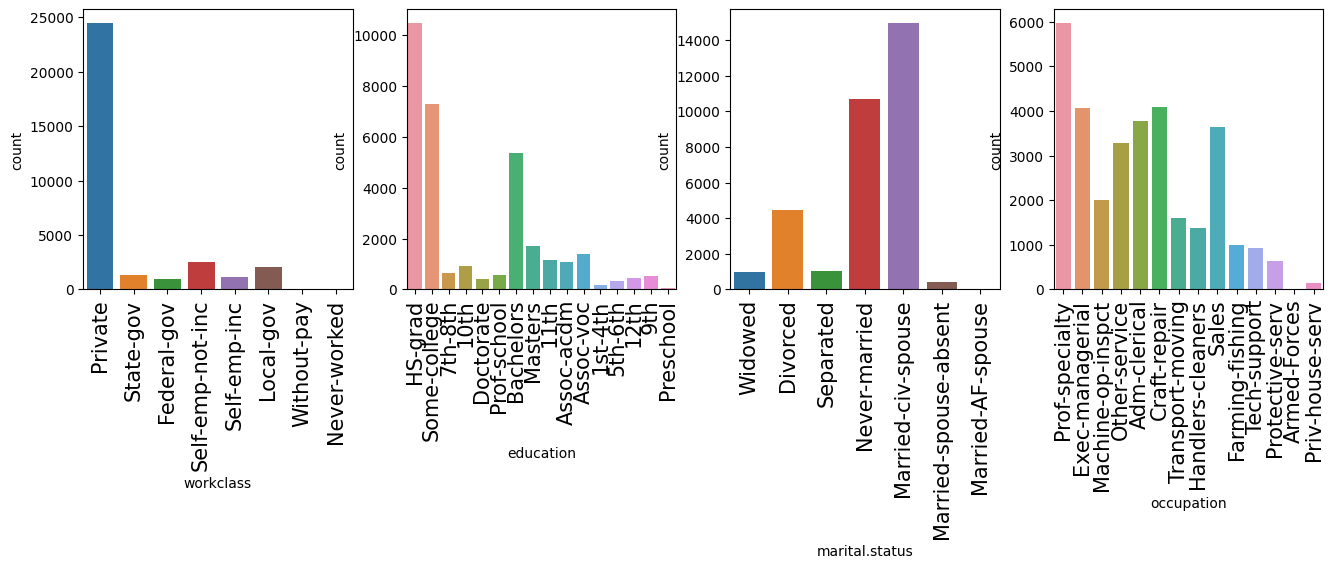

In [17]:
columns1=["workclass","education","marital.status","occupation"]
plt.figure(figsize=(16,8))
for i in range(0,len(columns1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[columns1[i]])
    plt.xticks(size=15,rotation=90)
    
    

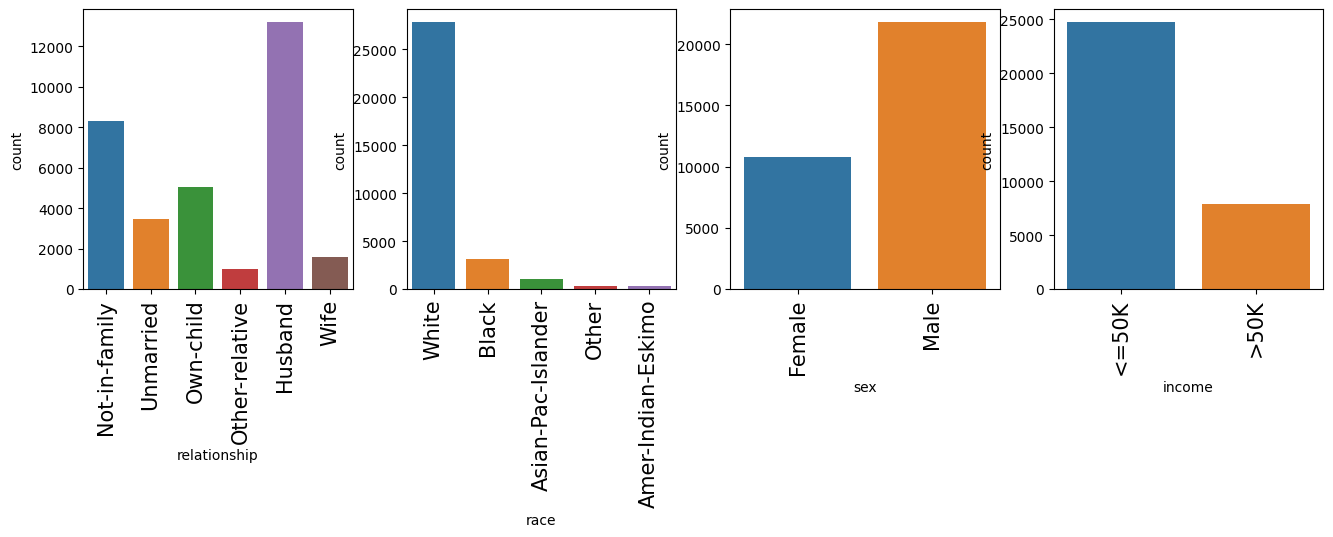

In [18]:
columns2=["relationship",'race',"sex","income"]
plt.figure(figsize=(16,8))
for i in range(0,len(columns2)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[columns2[i]])
    plt.xticks(size=15,rotation=90)

<Figure size 640x480 with 0 Axes>

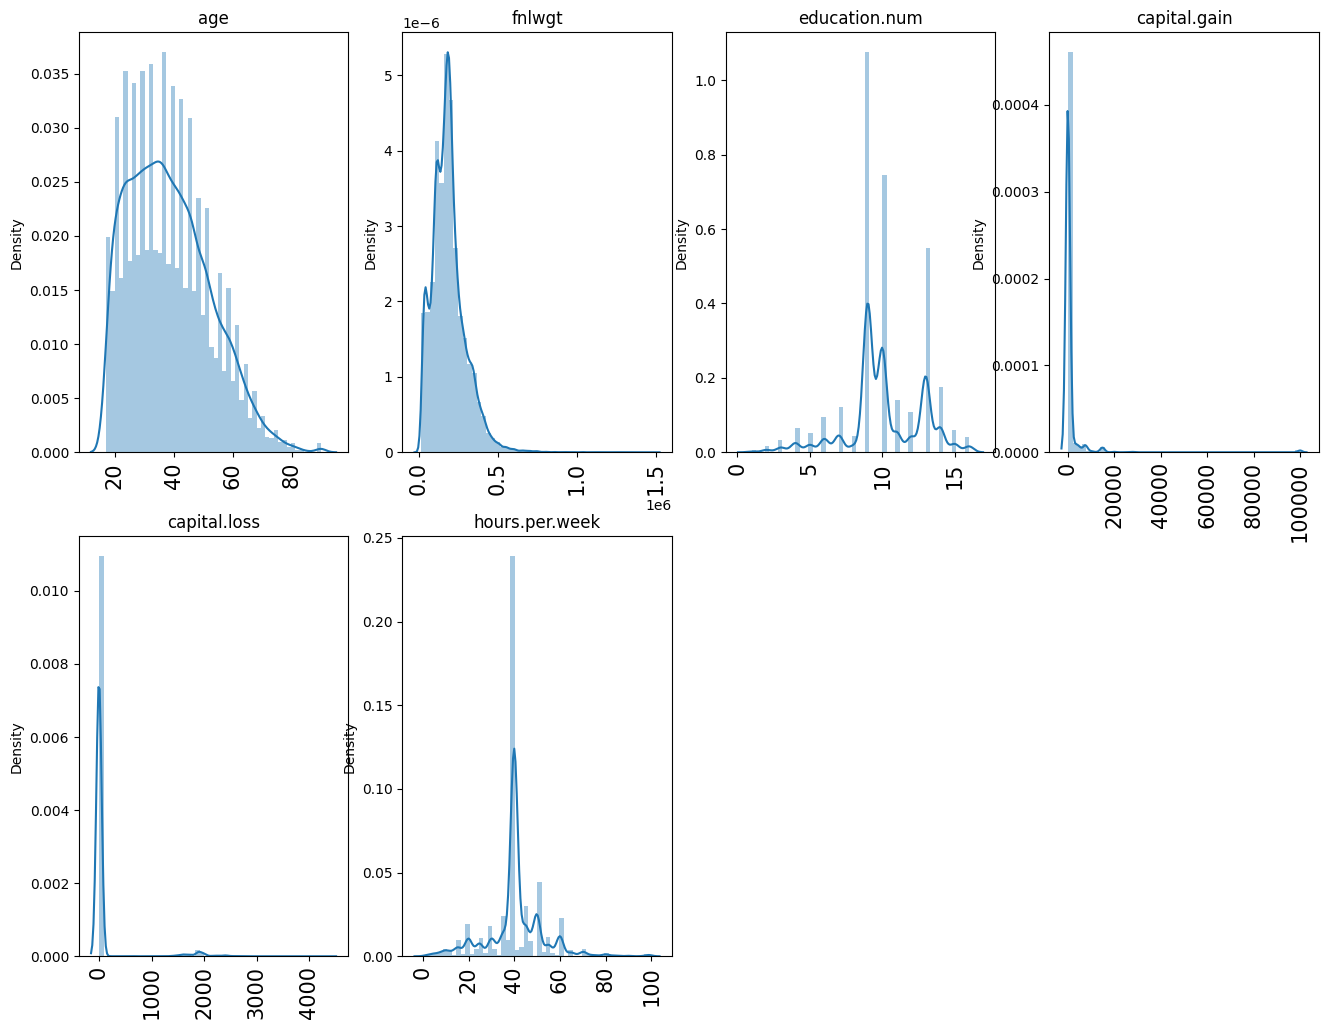

In [19]:
plt.suptitle("Distribution Graphs of numerical features")
plt.figure(figsize=(16,12))
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.distplot(x=data[numerical_features[i]])
    plt.title(numerical_features[i])
    plt.xticks(size=15,rotation=90)
    


<Figure size 640x480 with 0 Axes>

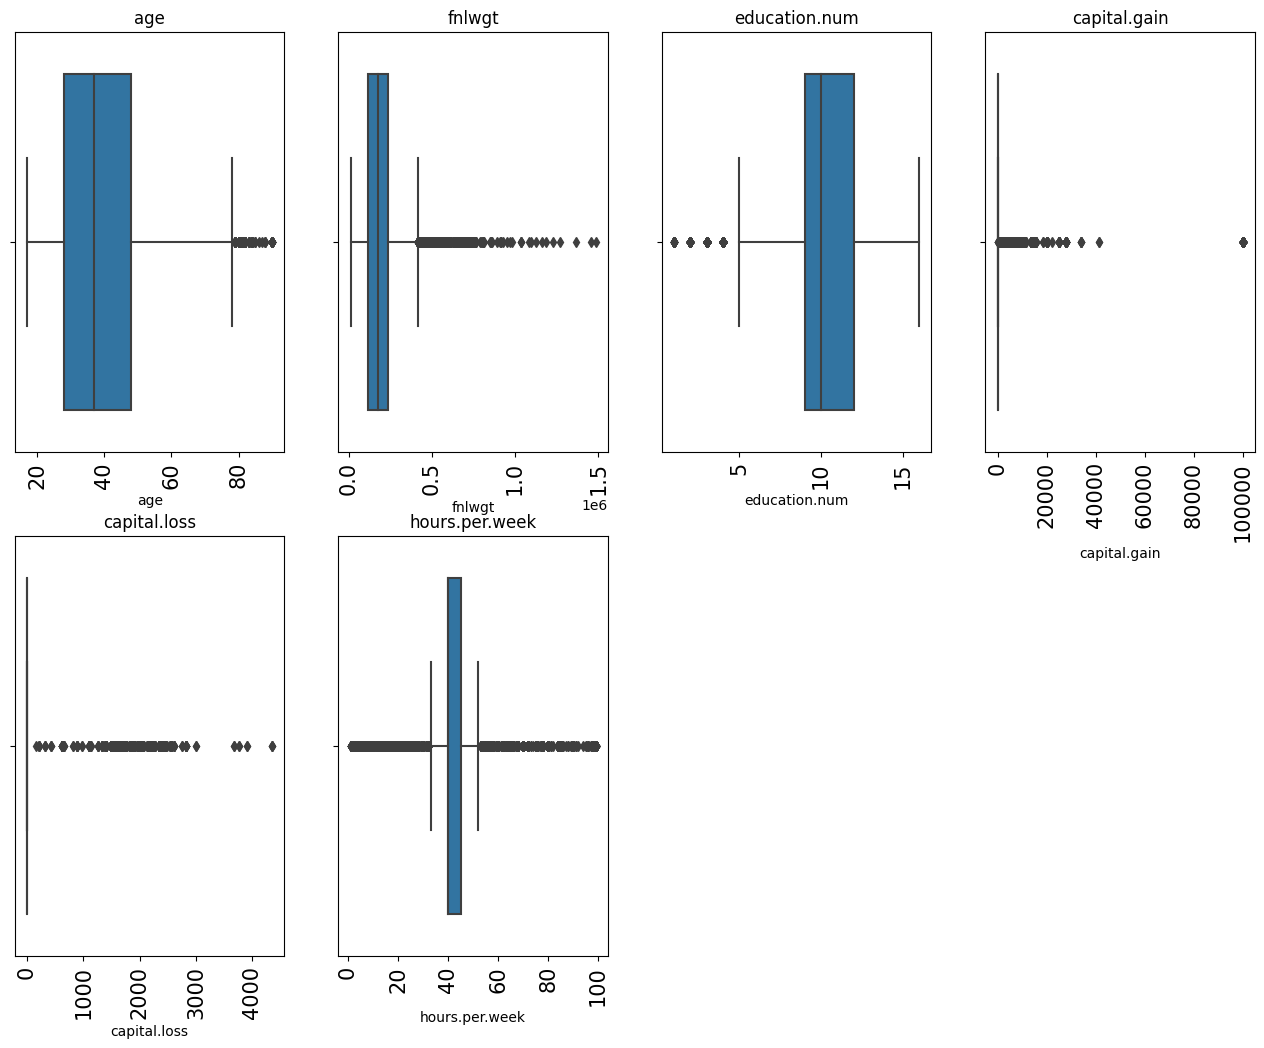

In [20]:
plt.suptitle("Distribution Graphs of numerical features")
plt.figure(figsize=(16,12))
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=data[numerical_features[i]])
    plt.title(numerical_features[i])
    plt.xticks(size=15,rotation=90)

<Axes: xlabel='income'>

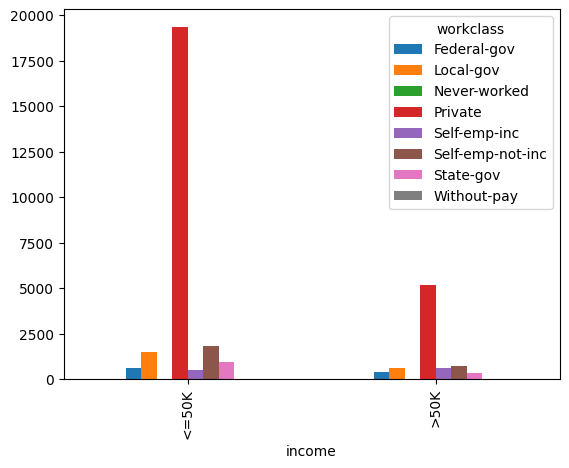

In [21]:
salary=pd.crosstab(data["income"],data["workclass"])
salary.plot(kind="bar")

<Axes: xlabel='income'>

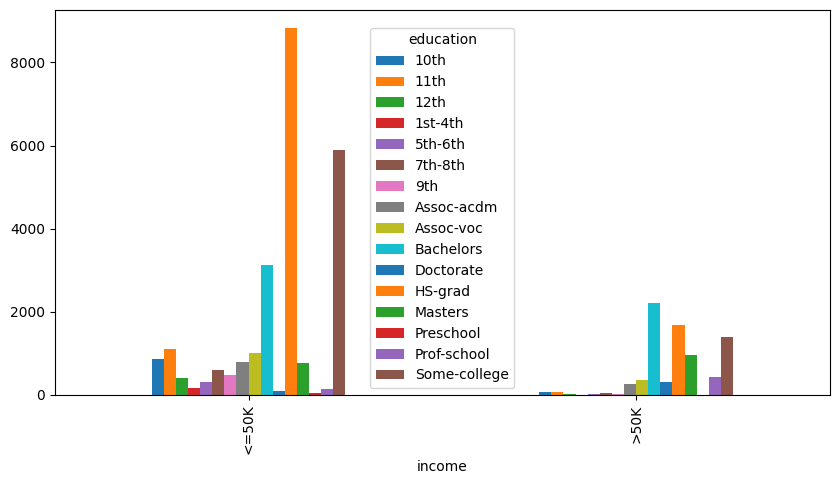

In [22]:
salary=pd.crosstab(data["income"],data["education"])

salary.plot(kind="bar",figsize=(10,5))

# Label Encoding - Data Transformation

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [24]:
categorical_features=categorical_features.drop("income")

In [25]:
for feature in categorical_features:
    le.fit(data[feature])
    data[feature]=le.transform(data[feature])

In [26]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,<=50K
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,<=50K
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,<=50K
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,<=50K
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,310152,15,10,4,10,1,4,1,0,0,40,38,<=50K
32557,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,<=50K
32558,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,>50K
32559,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,<=50K


In [27]:
data["income"]=data["income"].map({"<=50K":0,">50K":1})

In [28]:
data["income"]

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32537, dtype: int64

<Axes: >

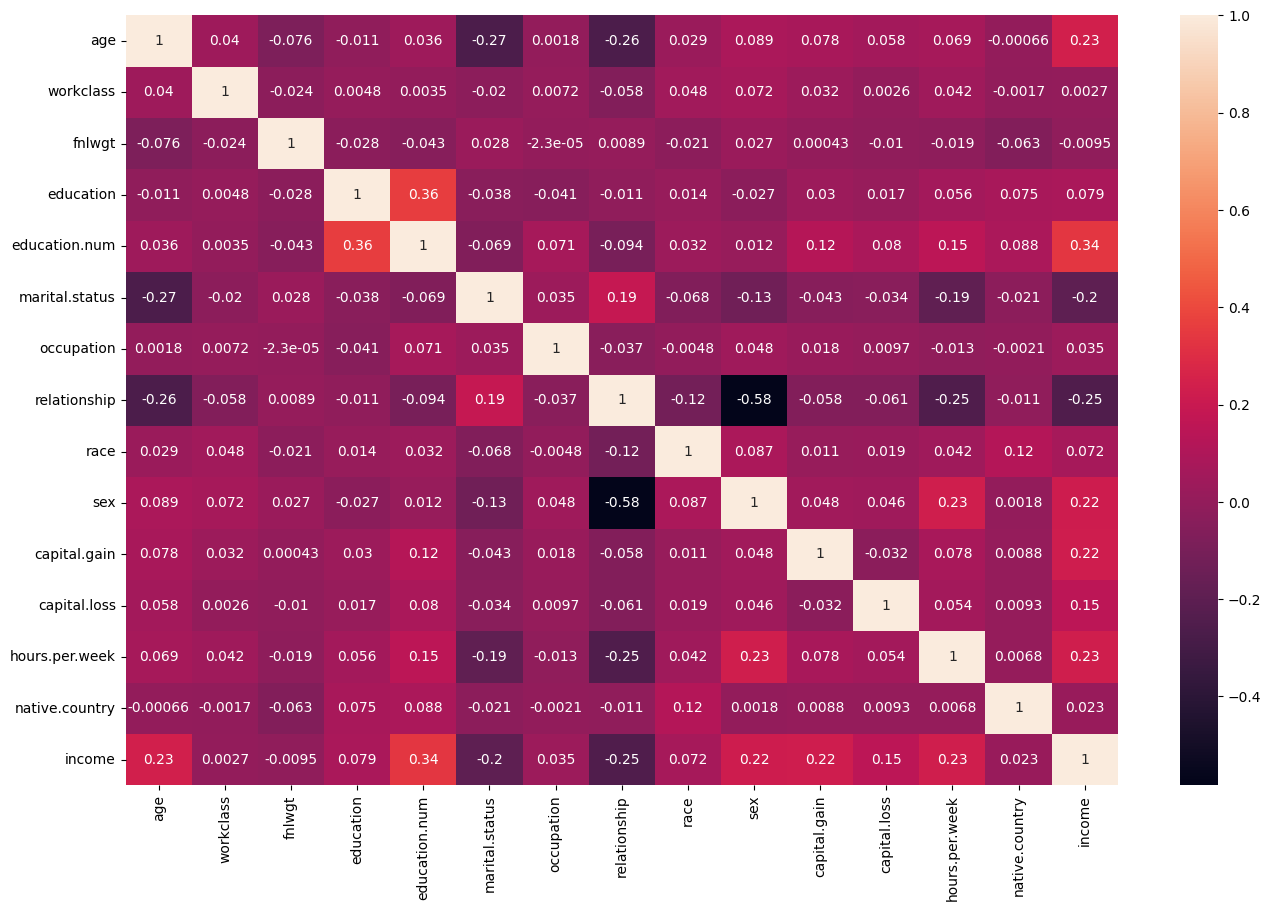

In [31]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True)

In [32]:
data=data.drop(columns=["fnlwgt","education","native.country"])

In [36]:
data.to_csv("Cleandata.csv",index=False)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,3,9,6,9,1,4,0,0,4356,40,0
1,82,3,9,6,3,1,4,0,0,4356,18,0
2,66,3,10,6,9,4,2,0,0,4356,40,0
3,54,3,4,0,6,4,4,0,0,3900,40,0
4,41,3,10,5,9,3,4,0,0,3900,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,10,4,10,1,4,1,0,0,40,0
32557,27,3,12,2,12,5,4,0,0,0,38,0
32558,40,3,9,2,6,0,4,1,0,0,40,1
32559,58,3,9,6,0,4,4,0,0,0,40,0
